## Importo módulos y archivos

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox

import geopandas as gpd
from shapely.geometry import Point, LineString, MultiLineString
from math import radians, sin, cos, sqrt, atan2
import osmnx as ox

#from mpl_toolkits.basemap import Basemap as Basemap

In [101]:
lista_estaciones = pd.read_csv('Avances/lista_estaciones.csv')
df_lista_estaciones = lista_estaciones.copy()

viajes = pd.read_csv('Avances/viajes_procesado.csv')
df_viajes = viajes.copy()

In [102]:
df_lista_estaciones

# Add a new column with lat-lon tuples
df_lista_estaciones['lat_lon'] = df_lista_estaciones.apply(lambda row: Point( row['long_estacion_origen'],row['lat_estacion_origen']), axis=1)
df_lista_estaciones

,nombre_estacion_origen,id_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,lat_lon
0,Plaza Italia,5.0,Av. Sarmiento 2601,-58.420954,-34.580550,POINT (-58.4209542 -34.5805497)
1,Tucuman,51.0,Tucuman & 9 De Julio Av.,-58.382126,-34.601478,POINT (-58.3821261 -34.6014776)
2,Humahuaca,161.0,3912 Humahuaca,-58.419676,-34.602078,POINT (-58.4196761 -34.6020779)
3,General Urquiza,335.0,Figueroa Alcorta & Sarmiento,-58.411278,-34.572165,POINT (-58.411278 -34.572165)
4,Guatemala,113.0,Guatemala 4773,-58.424996,-34.585878,POINT (-58.424996 -34.585878)
...,...,...,...,...,...,...
326,Allende,314.0,Allende 2794,-58.511672,-34.614787,POINT (-58.5116722 -34.6147875)
327,Cerretti,307.0,Ceretti 2892,-58.496232,-34.574424,POINT (-58.4962318 -34.5744245)
328,Habana,55.0,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,POINT (-58.4949585 -34.5865976)
329,Belgrano,57.0,5 de julio 423,-58.371250,-34.612690,POINT (-58.37125 -34.6126898)


In [103]:
df_viajes
df_viajes = df_viajes.rename(columns={'nombre_estacion_origen_x': 'nombre_estacion_origen'})

In [104]:
#Agrego al dataframe de viajes los datos de puntos de geopandas del inicio y la llegada

df_viajes = df_viajes.merge(df_lista_estaciones[['nombre_estacion_origen','lat_lon']],on='nombre_estacion_origen',how = 'left')
# Rename the column in the merged dataframe
df_viajes = df_viajes.rename(columns={'lat_lon': 'lat_lon_origen'})


In [105]:
df_viajes = df_viajes.merge(df_lista_estaciones[['nombre_estacion_origen','lat_lon']],left_on='nombre_estacion_destino', right_on='nombre_estacion_origen',how = 'left')
# Rename the column in the merged dataframe
df_viajes = df_viajes.rename(columns={'lat_lon': 'lat_lon_destino'})
df_viajes = df_viajes.rename(columns={'nombre_estacion_origen_x': 'nombre_estacion_origen'})


In [106]:
df_viajes = df_viajes.drop('nombre_estacion_origen_y', axis=1)

In [107]:
df_viajes

,Id_recorrido,duracion_recorrido,dia_origen_fecha,dia_semana_origen,horario_origen,id_estacion_origen,nombre_estacion_origen,dia_destino_fecha,dia_semana_destino,horario_destino,id_estacion_destino,nombre_estacion_destino,id_usuario,modelo_bicicleta,Género,tipo_viaje,lat_lon_origen,lat_lon_destino
0,13267975,2610,2022-01-16,1,14:58,5.0,Plaza Italia,2022-01-16,1,15:42,335.0,General Urquiza,776361,ICONIC,FEMALE,PAGO,POINT (-58.4209542 -34.5805497),POINT (-58.411278 -34.572165)
1,13268526,545,2022-01-16,1,17:26,51.0,Tucuman,2022-01-16,1,17:35,174.0,Ministerio De Educacion,776407,ICONIC,MALE,GRATUITO,POINT (-58.3821261 -34.6014776),POINT (-58.391768 -34.597225)
2,13268400,2061,2022-01-16,1,16:51,161.0,Humahuaca,2022-01-16,1,17:25,117.0,Humberto 1°,671762,ICONIC,FEMALE,PAGO,POINT (-58.4196761 -34.6020779),POINT (-58.3741759 -34.6201008)
3,13268164,12748,2022-01-16,1,15:58,335.0,General Urquiza,2022-01-16,1,19:30,204.0,Biarritz,776361,ICONIC,FEMALE,PAGO,POINT (-58.411278 -34.572165),POINT (-58.47739 -34.60547)
4,13270010,4337,2022-01-16,1,23:40,113.0,Guatemala,2022-01-17,2,00:52,125.0,F.j.santamaria De Oro,454615,ICONIC,OTHER,PAGO,POINT (-58.424996 -34.585878),POINT (-58.428016 -34.583323)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922797,16700616,734,2022-12-20,3,22:34,207.0,Plaza Arenales,2022-12-20,3,22:46,224.0,Baigorria,887601,FIT,FEMALE,GRATUITO,POINT (-58.5111458 -34.5997308),POINT (-58.50302 -34.6108915)
2922798,16699813,764,2022-12-20,3,20:03,390.0,De Los Ombues,2022-12-20,3,20:16,15.0,Amenabar,729879,FIT,MALE,GRATUITO,POINT (-58.4281 -34.5602),POINT (-58.4475236 -34.572056)
2922799,16695096,4328,2022-12-20,3,12:13,169.0,Facultad De Psicologia,2022-12-20,3,13:25,175.0,Plaza Mackenna,220076,FIT,FEMALE,PAGO,POINT (-58.411856 -34.6123459),POINT (-58.4771259 -34.5436888)
2922800,16698330,1405,2022-12-20,3,17:26,62.0,Parque Onega,2022-12-20,3,17:50,234.0,Avenida Triunvirato,193874,FIT,MALE,GRATUITO,POINT (-58.513837 -34.5934185),POINT (-58.4952184 -34.5657087)


### Armado de viajes mensuales

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
len(df_viajes)

2922802

In [110]:
# Convert date columns to datetime format
df_viajes['dia_origen_fecha'] = pd.to_datetime(df_viajes['dia_origen_fecha'])

# Extract the month from the date column
df_viajes['month'] = df_viajes['dia_origen_fecha'].dt.month

# Group the data by month and count the number of trips
monthly_trips = df_viajes.groupby('month').size().reset_index(name='trip_count')

# Display the new DataFrame
print(monthly_trips)

monthly_trips.to_csv('viajes_mensuales.csv')


    month  trip_count
0       1      191864
1       2      219116
2       3      266859
3       4      253607
4       5      227669
5       6      189362
6       7      177903
7       8      271952
8       9      303989
9      10      284004
10     11      300310
11     12      236167


In [111]:
monthly_counts

1-2022     191864
10-2022    284004
11-2022    300310
12-2022    236167
2-2022     219116
3-2022     266859
4-2022     253607
5-2022     227669
6-2022     189362
7-2022     177903
8-2022     271952
9-2022     303989
Name: month_year, dtype: int64

Calculo de umbrales para grafos. Interesa graficar únicamente aquellos enlaces donde se de mensualmente un volumen de tráfico mensual del 0,02% del trafico mensual (1 de cada 5000 viajes del mes)

In [140]:
conteo_mensual = pd.read_csv('viajes_mensuales.csv')
conteo_mensual = conteo_mensual.copy()

In [148]:
conteo_mensual['umbral'] = round(conteo_mensual['trip_count']*1/5000,0)

In [149]:
conteo_mensual

,Unnamed: 0,month,trip_count,umbral
0,0,1,191864,38.0
1,1,2,219116,44.0
2,2,3,266859,53.0
3,3,4,253607,51.0
4,4,5,227669,46.0
5,5,6,189362,38.0
6,6,7,177903,36.0
7,7,8,271952,54.0
8,8,9,303989,61.0
9,9,10,284004,57.0


<AxesSubplot: >

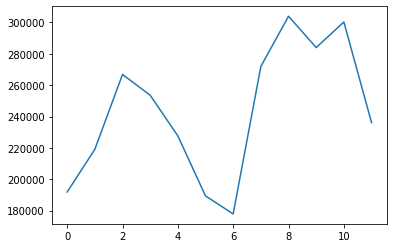

In [334]:
conteo_mensual.trip_count.plot()

### Creación de matriz de viajes

Creo dataframes por mes

In [117]:

# Convert 'dia_origen_fecha' column to datetime type
df_viajes['dia_origen_fecha'] = pd.to_datetime(df_viajes['dia_origen_fecha'])

# Group the dataframe by month
grouped_by_month = df_viajes.groupby(df_viajes['dia_origen_fecha'].dt.month)

# Create a list to store the dataframes for each month
dataframes_by_month = []

# Iterate over each group (month) and create a dataframe
for month, group_df in grouped_by_month:
    # Append the dataframe to the list, using the month as the name
    dataframes_by_month.append(group_df.copy())

# Print the list of dataframes
for i, df in enumerate(dataframes_by_month):
    print(f"Dataframe for month {i+1}:")
    print(df)
    print("-----------------------------------")


Dataframe for month 1:
        Id_recorrido  duracion_recorrido dia_origen_fecha  dia_semana_origen  \
0           13267975                2610       2022-01-16                  1   
1           13268526                 545       2022-01-16                  1   
2           13268400                2061       2022-01-16                  1   
3           13268164               12748       2022-01-16                  1   
4           13270010                4337       2022-01-16                  1   
...              ...                 ...              ...                ...   
191859      13393889                1872       2022-01-31                  2   
191860      13388952                 805       2022-01-31                  2   
191861      13388801                1646       2022-01-31                  2   
191862      13392376                 961       2022-01-31                  2   
191863      13393922                 677       2022-01-31                  2   

       horario_o

In [115]:
#Saco estaciones
estaciones = df_lista_estaciones['nombre_estacion_origen'].unique()

tamaño_matriz = len(estaciones)
matriz_viajes = pd.DataFrame(np.zeros((tamaño_matriz,tamaño_matriz),dtype=int),
                             index=estaciones, columns=estaciones)



In [116]:
""" # Count the number of times each origin-destination pair occurs
trip_counts = df_viajes.groupby(['nombre_estacion_origen', 'nombre_estacion_destino']).size().reset_index(name='count')
 """

In [21]:
""" # Itero por cada elemento de la matriz
for _, row in trip_counts.iterrows():
    origin = row['nombre_estacion_origen']
    destination = row['nombre_estacion_destino']
    count = row['count']
    matriz_viajes.loc[origin, destination] = count

# Ploteo la matriz
print(matriz_viajes) """

                   Plaza Italia   Tucuman   Humahuaca   General Urquiza  \
 Plaza Italia              3166        28         151              2017   
 Tucuman                     20       177          28                21   
 Humahuaca                  162        13         670                54   
 General Urquiza           1553        12          28              2419   
 Guatemala                  617         5         219               308   
...                         ...       ...         ...               ...   
 Allende                      0         0           0                 0   
 Cerretti                     0         0           0                 0   
 Habana                       1         0           1                 0   
 Belgrano                     1         1           2                 1   
 Macacha Guemes              29       136          10                28   

                   Guatemala   Garcia Del Rio   Monroe   Agronomia   Biarritz  \
 Plaza Italia     

In [120]:
# Create a list to store the matriz_viajes for each month
matriz_viajes_by_month = []

# Iterate over each dataframe in dataframes_by_month
for df_month in dataframes_by_month:
    # Count the number of times each origin-destination pair occurs for the current month
    trip_counts = df_month.groupby(['nombre_estacion_origen', 'nombre_estacion_destino']).size().reset_index(name='count')

    # Initialize a new matriz_viajes DataFrame
    matriz_viajes = pd.DataFrame(columns=df_viajes['nombre_estacion_destino'].unique(), index=df_viajes['nombre_estacion_origen'].unique())
    matriz_viajes.fillna(0, inplace=True)

    # Iterate over each element in the trip_counts DataFrame
    for _, row in trip_counts.iterrows():
        origin = row['nombre_estacion_origen']
        destination = row['nombre_estacion_destino']
        count = row['count']
        matriz_viajes.loc[origin, destination] = count

    # Append the matriz_viajes for the current month to the list
    matriz_viajes_by_month.append(matriz_viajes)

# Print the matriz_viajes for each month
for i, matriz_viajes in enumerate(matriz_viajes_by_month):
    print(f"Matriz viajes for month {i+1}:")
    print(matriz_viajes)
    print("-----------------------------------")

Matriz viajes for month 1:
                   General Urquiza   Ministerio De Educacion   Humberto 1°  \
 Plaza Italia                  162                         8             0   
 Tucuman                         4                         4             0   
 Humahuaca                       8                        13             3   
 General Urquiza               254                         3             1   
 Guatemala                      31                         4             1   
...                            ...                       ...           ...   
 Campana Ii                      0                         0             0   
 Allende                         0                         0             0   
 Cerretti                        0                         0             0   
 Habana                          0                         0             0   
 Belgrano                        0                         0             0   

                   Biarritz   F.j.sa

In [150]:
matriz_viajes_by_month[0]

umbrales = conteo_mensual['umbral'].to_list()

In [335]:
umbrales

[38.0, 44.0, 53.0, 51.0, 46.0, 38.0, 36.0, 54.0, 61.0, 57.0, 60.0, 47.0]

In [136]:
matriz_viajes_by_month[2]

,General Urquiza,Ministerio De Educacion,Humberto 1°,Biarritz,F.j.santamaria De Oro,Garcia Del Rio,Plaza Rafael Hernandez,Agronomia,Plaza Italia,Parque Lezama,...,Avenida Triunvirato,Peron,Costanera Norte,Armenia,Campana Ii,Allende,Plaza Sabattini,Cerretti,Habana,Belgrano
Plaza Italia,208,10,1,0,21,0,6,1,548,0,...,0,0,0,0,0,0,0,0,0,0
Tucuman,0,10,2,0,2,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
Humahuaca,6,35,7,0,19,0,1,0,12,0,...,0,0,0,0,0,0,0,0,0,0
General Urquiza,229,12,1,0,13,0,4,0,136,0,...,0,0,0,0,0,0,0,0,0,0
Guatemala,24,6,1,0,35,0,5,0,62,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campana Ii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allende,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cerretti,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Habana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# Assume you have a matrix called 'matrix'
threshold = 53  # Define the threshold value

# Count the number of values higher than the threshold
count = np.count_nonzero(matriz_viajes_by_month[2] > threshold)

print(f"Number of values higher than {threshold}: {count}")

Number of values higher than 53: 493


In [163]:
import numpy as np

# Assuming you have a matrix called 'matrix'
sorted_matrix = np.sort(matriz_viajes_by_month[2], axis=None)[::-1]

print(sorted_matrix)

[548 319 274 ...   0   0   0]


AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ploteo la matriz
plt.figure(figsize=(200, 200))
sns.heatmap(matriz_viajes, cmap='YlOrRd', annot=True, fmt='d', cbar=True)
plt.title('Trip Counts Matrix')
plt.xlabel('Destination Station')
plt.ylabel('Origin Station')
plt.show()


## Visualización

In [153]:
# Create a list to store the graphs for each month
graphs_by_month = []

# Iterate over each matriz_viajes DataFrame in matriz_viajes_by_month
for i,matriz_viajes in enumerate(matriz_viajes_by_month):
    umbral = umbrales[i]
    
    # Create a graph
    graph = nx.Graph()

    # Add nodes with latitude and longitude attributes
    for station in df_lista_estaciones['nombre_estacion_origen']:
        lat_lon = df_lista_estaciones[df_lista_estaciones['nombre_estacion_origen'] == station]['lat_lon'].values[0]
        lat, lon = lat_lon.y, lat_lon.x
        graph.add_node(station, latitude=lat, longitude=lon)

    # Add edges with weight
    for i, origin in enumerate(matriz_viajes.index):
        for j, destination in enumerate(matriz_viajes.columns):
            count = matriz_viajes.iloc[i, j]
            if count > umbral:
                graph.add_edge(origin, destination, weight=count)

    # Append the graph for the current month to the list
    graphs_by_month.append(graph)

# Print the nodes and edges for each graph
for i, graph in enumerate(graphs_by_month):
    print(f"Graph for month {i+1}:")
    print(graph.nodes())
    print(graph.edges(data=True))
    print("-----------------------------------")

Graph for month 1:
[' Plaza Italia', ' Tucuman', ' Humahuaca', ' General Urquiza', ' Guatemala', ' Garcia Del Rio', ' Monroe', ' Agronomia', ' Biarritz', ' Plazoleta Colombia', ' Ecoparque', ' San Jose De Flores', ' Acevedo', ' Cerrito', ' Carlos Gardel', ' Aduana', ' Julieta Lanteri', ' Lima', ' Barrancas De Belgrano', ' Coghlan', ' Pacifico', ' Villa Urquiza', ' Beiro', ' Beiro Y San Martín', ' Las Casas', ' Plaza Almagro', ' Montevideo', ' Billinghurst', ' Aguero', ' Hospital Garrahan', ' Plaza Alemania', ' Posadas', ' Arenales Y Aguero', ' Facultad De Derecho', ' F.j.santamaria De Oro', ' San Miguel De Garicoits', ' Plaza Irlanda', ' Madero Office', ' Parque Las Heras', ' Juana Manso I', ' Uruguay', ' Chile', ' Paraná', ' Saavedra', ' Guayaquil', ' Esmeralda', ' Humberto 1°', ' Yatay', 'Hospital De Clínicas', ' Ministerio De Educacion', ' Constitución', ' Parque Sarmiento I', ' Quinteros Lidoro', ' Armenia Y Gorriti', ' Coronel Diaz', ' Godoy Cruz Y Libertador', ' Venancio Flores',

In [321]:
#Creo cada graph por separado
graph_enero = graphs_by_month[0]
graph_febrero = graphs_by_month[1]
graph_marzo = graphs_by_month[2]
graph_abril = graphs_by_month[3]
graph_mayo = graphs_by_month[4]
graph_junio = graphs_by_month[5]
graph_julio = graphs_by_month[6]
graph_agosto = graphs_by_month[7]
graph_septiembre = graphs_by_month[8]
graph_octubre = graphs_by_month[9]
graph_noviembre = graphs_by_month[10]
graph_diciembre = graphs_by_month[11]

viajes_enero = conteo_mensual['trip_count'][0]
viajes_febrero = conteo_mensual['trip_count'][1]
viajes_marzo = conteo_mensual['trip_count'][2]
viajes_abril = conteo_mensual['trip_count'][3]
viajes_mayo = conteo_mensual['trip_count'][4]
viajes_junio = conteo_mensual['trip_count'][5]

viajes_julio = conteo_mensual['trip_count'][6]
viajes_agosto = conteo_mensual['trip_count'][7]
viajes_septiembre = conteo_mensual['trip_count'][8]
viajes_octubre = conteo_mensual['trip_count'][9]
viajes_noviembre = conteo_mensual['trip_count'][10]
viajes_diciembre = conteo_mensual['trip_count'][11]



In [320]:
conteo_mensual['trip_count'][0]

191864

Inicio el grafo de análisis

In [269]:
graph = graph_abril

In [299]:
graph.edges(data=True)


EdgeDataView([(' Plaza Italia', ' General Urquiza', {'weight': 103}), (' Plaza Italia', ' Plaza Italia', {'weight': 320}), (' Plaza Italia', ' Pacifico', {'weight': 79}), (' Plaza Italia', ' Plaza Palermo Viejo', {'weight': 69}), (' Plaza Italia', ' Plaza Alemania', {'weight': 68}), (' Plaza Italia', ' Guatemala', {'weight': 67}), (' Plaza Italia', ' Ecoparque', {'weight': 129}), (' Plaza Italia', ' Godoy Cruz Y Libertador', {'weight': 93}), (' Plaza Italia', ' Plaza República De Ecuador', {'weight': 61}), (' Plaza Italia', ' Planetario', {'weight': 107}), (' Plaza Italia', ' Facultad De Derecho', {'weight': 66}), (' Plaza Italia', ' Araoz', {'weight': 52}), (' Humahuaca', ' Parque Centenario', {'weight': 55}), (' Humahuaca', ' Plaza Guemes', {'weight': 54}), (' Humahuaca', ' Carlos Gardel', {'weight': 59}), (' Humahuaca', ' Yatay', {'weight': 103}), (' Humahuaca', ' Malabia', {'weight': 68}), (' Humahuaca', ' Velasco', {'weight': 80}), (' Humahuaca', ' Billinghurst', {'weight': 55}), 

In [284]:
import numpy as np
import folium
from branca.colormap import LinearColormap
from branca.colormap import StepColormap
from folium import DivIcon
from folium.plugins import FloatImage

In [303]:
import numpy as np
import folium
from branca.colormap import LinearColormap

# Create a map centered around Buenos Aires
map_buenos_aires = folium.Map(location=[-34.6037, -58.3816], tiles='CartoDB Positron', zoom_start=12)

# Calculate minimum and maximum weights
weights = [edge[2]['weight'] for edge in graph.edges(data=True)]
weight_q1 = np.percentile(weights, 20)
weight_q2 = np.percentile(weights, 40)
weight_q3 = np.percentile(weights, 60)
weight_q4 = np.percentile(weights, 80)
max_weight = max(weights)

# Define colormap for the edge weights
colormap = LinearColormap(colors=['lightcoral', 'greenyellow', 'skyblue', 'midnightblue'], index=[weight_q1, weight_q2, weight_q3, weight_q4], vmin=min(weights), vmax=max(weights))

colors_chart = []

# Add the graph edges as PolyLines on the map
for edge in graph.edges(data=True):
    station1 = edge[0]
    station2 = edge[1]
    weight = int(edge[2]['weight'])

    lat1 = graph.nodes[station1]['latitude']
    lon1 = graph.nodes[station1]['longitude']
    lat2 = graph.nodes[station2]['latitude']
    lon2 = graph.nodes[station2]['longitude']
    mes= 'abril'
    color = colormap(weight)
    colors_chart.append(color)
    
    line = folium.PolyLine(locations=[(lat1, lon1), (lat2, lon2)], weight=4, color=color)
    map_buenos_aires.add_child(line)
    
    
    # Add label to edge with maximum weight
    if weight == max_weight:
        estacion_1 = edge[0]
        estacion_2 = edge[1]
        label = folium.map.Marker(
            location=[lat1, lon1],
            icon=DivIcon(
                icon_size=(200, 200),
                icon_anchor=(200, 200),
                html="""<div style="background-color: lightyellow; border: 1px solid black; font-weight: bold; font-size: 14px; padding: 6px;">Cantidad de viajes máximos registrados en el mes de {0}: {1}<br>
                Ruta: {2} - {3}</div>""".format(mes, max_weight, estacion_1, estacion_2)
            )
        )
        map_buenos_aires.add_child(label)
    
# Determine connected nodes
connected_nodes = set(edge[0] for edge in graph.edges()) | set(edge[1] for edge in graph.edges())

# Add the graph nodes as circle markers on the map
for node in graph.nodes():
    lat = graph.nodes[node]['latitude']
    lon = graph.nodes[node]['longitude']
    
    # Check if node is connected
    if node in connected_nodes:
        color = 'blue'
    else:
        color = 'gray'
    
    folium.CircleMarker(location=[lat, lon], radius=5, color=color, fill=True, fill_color=color).add_to(map_buenos_aires)

# Create a custom legend with variable values
legend_html = '''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 200px; height: 200px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white; opacity:0.8">
         <p style="margin: 5px"><strong><span style="color:black">Legend</span></strong></p>
         <p style="margin: 5px"><span style="color:lightcoral; font-weight:bold">Q1: Menos de {0:.0f} viajes por mes</span></p>
         <p style="margin: 5px"><span style="color:greenyellow; font-weight:bold">Q2: {0:.0f}-{1:.0f} viajes por mes</span></p>
         <p style="margin: 5px"><span style="color:skyblue; font-weight:bold">Q3: {1:.0f}-{2:.0f} viajes por mes</span></p>
         <p style="margin: 5px"><span style="color:midnightblue; font-weight:bold">Q4: {3:.0f} o más viajes por mes</span></p>
     </div>
'''.format(weight_q1, weight_q2, weight_q3, weight_q4)


# Add the legend to the map
map_buenos_aires.get_root().html.add_child(folium.Element(legend_html))

# Add a layer control to the map
#folium.LayerControl().add_to(map_buenos_aires)


# Add the legend to the map
map_buenos_aires.get_root().html.add_child(folium.Element(legend_html))

# Add a layer control to the map
folium.LayerControl().add_to(map_buenos_aires)

# Save the map as a PNG image
map_buenos_aires.save(f'grafos/map_buenos_aires_{mes}.png')
# Display the map
map_buenos_aires





In [332]:
def grafo_mes(graph,mes,viajes_mes):
    # Create a map centered around Buenos Aires
    map_buenos_aires = folium.Map(location=[-34.6037, -58.3816], tiles='CartoDB Positron', zoom_start=12)

    # Calculate minimum and maximum weights
    weights = [edge[2]['weight'] for edge in graph.edges(data=True)]
    weight_q1 = np.percentile(weights, 20)
    weight_q2 = np.percentile(weights, 40)
    weight_q3 = np.percentile(weights, 60)
    weight_q4 = np.percentile(weights, 80)
    max_weight = max(weights)

    # Define colormap for the edge weights
    colormap = LinearColormap(colors=['lightcoral', 'greenyellow', 'skyblue', 'midnightblue'], index=[weight_q1, weight_q2, weight_q3, weight_q4], vmin=min(weights), vmax=max(weights))

    colors_chart = []

    # Add the graph edges as PolyLines on the map
    for edge in graph.edges(data=True):
        station1 = edge[0]
        station2 = edge[1]
        weight = int(edge[2]['weight'])

        lat1 = graph.nodes[station1]['latitude']
        lon1 = graph.nodes[station1]['longitude']
        lat2 = graph.nodes[station2]['latitude']
        lon2 = graph.nodes[station2]['longitude']
        
        color = colormap(weight)
        colors_chart.append(color)
        
        line = folium.PolyLine(locations=[(lat1, lon1), (lat2, lon2)], weight=2, color=color)
        map_buenos_aires.add_child(line)
        
        
        # Add label to edge with maximum weight
        if weight == max_weight:
            estacion_1 = edge[0]
            estacion_2 = edge[1]
            label = folium.map.Marker(
                location=[lat1, lon1],
                icon=DivIcon(
                    icon_size=(200, 200),
                    icon_anchor=(200, 200),
                    html="""<div style="background-color: lightyellow; border: 1px solid black; font-weight: bold; font-size: 14px; padding: 6px;">Cantidad de viajes máximos registrados en el mes de {0}: {1}<br>
                    Ruta: {2} - {3}</div>""".format(mes, max_weight, estacion_1, estacion_2)
                )
            )
            map_buenos_aires.add_child(label)
        
    # Determine connected nodes
    connected_nodes = set(edge[0] for edge in graph.edges()) | set(edge[1] for edge in graph.edges())

    # Add the graph nodes as circle markers on the map
    for node in graph.nodes():
        lat = graph.nodes[node]['latitude']
        lon = graph.nodes[node]['longitude']
        
        # Check if node is connected
        if node in connected_nodes:
            color = 'blue'
        else:
            color = 'gray'
        
        folium.CircleMarker(location=[lat, lon], radius=3, color=color, fill=True, fill_color=color).add_to(map_buenos_aires)

    # Add shapefile layer to the map
    shapefile_ciclovias = gpd.read_file('datasets/estaciones/ciclovias.geojson')
    
    # Define the style function for the shapefile layer
    style_function = lambda feature: {
        'color': 'gray',  # Line color
        'weight': 2,  # Line weight
        'opacity': 0.6,  # Line opacity (transparency)
        'dashArray': '5, 5',  # Line dash pattern
    }

    folium.GeoJson(shapefile_ciclovias, style_function=style_function).add_to(map_buenos_aires)

    
    # Create a custom legend with variable values
    legend_html = '''
        <div style="position: fixed; 
                    bottom: 50px; left: 50px; width: 200px; height: 200px; 
                    border:2px solid grey; z-index:9999; font-size:14px;
                    background-color:white; opacity:0.8">
            <p style="margin: 5px"><strong><span style="color:black">Leyenda por color</span></strong></p>
            <p style="margin: 5px"><span style="color:lightcoral; font-weight:bold">Q1: Menos de {0:.0f} viajes por mes</span></p>
            <p style="margin: 5px"><span style="color:greenyellow; font-weight:bold">Q2: {0:.0f}-{1:.0f} viajes por mes</span></p>
            <p style="margin: 5px"><span style="color:skyblue; font-weight:bold">Q3: {1:.0f}-{2:.0f} viajes por mes</span></p>
            <p style="margin: 5px"><span style="color:midnightblue; font-weight:bold">Q4: {3:.0f} o más viajes por mes</span></p>
            <p style="margin: 5px"><span style="color:black; font-weight:bold">Viajes totales: {4:.0f}</span></p>
        </div>
    '''.format(weight_q1, weight_q2, weight_q3, weight_q4, viajes_mes)


    # Add the legend to the map
    map_buenos_aires.get_root().html.add_child(folium.Element(legend_html))

    # Add a layer control to the map
    #folium.LayerControl().add_to(map_buenos_aires)


    # Add the legend to the map
    map_buenos_aires.get_root().html.add_child(folium.Element(legend_html))

    # Add a layer control to the map
    folium.LayerControl().add_to(map_buenos_aires)

    # Save the map as a PNG image
    map_buenos_aires.save(f'grafos/map_buenos_aires_{mes}.html')
    # Display the map
    return map_buenos_aires


In [333]:
grafo_mes(graph_enero,'enero',viajes_enero)
grafo_mes(graph_febrero,'febrero',viajes_febrero)
grafo_mes(graph_marzo,'marzo',viajes_marzo)
grafo_mes(graph_abril,'abril',viajes_abril)
grafo_mes(graph_mayo,'mayo',viajes_mayo)
grafo_mes(graph_junio,'junio',viajes_junio)

grafo_mes(graph_julio,'julio',viajes_julio)
grafo_mes(graph_agosto,'agosto',viajes_agosto)
grafo_mes(graph_septiembre,'septiembre',viajes_septiembre)
grafo_mes(graph_octubre,'octubre',viajes_octubre)
grafo_mes(graph_noviembre,'noviembre',viajes_noviembre)
grafo_mes(graph_diciembre,'diciembre',viajes_diciembre)

### Creación de matriz de viajes

In [ ]:
#Saco estaciones
estaciones = df_lista_estaciones['nombre_estacion_origen'].unique()

tamaño_matriz = len(estaciones)
matriz_viajes = pd.DataFrame(np.zeros((tamaño_matriz,tamaño_matriz),dtype=int),
                             index=estaciones, columns=estaciones)



In [ ]:
# Count the number of times each origin-destination pair occurs
trip_counts = df_viajes.groupby(['nombre_estacion_origen', 'nombre_estacion_destino']).size().reset_index(name='count')


In [ ]:
# Itero por cada elemento de la matriz
for _, row in trip_counts.iterrows():
    origin = row['nombre_estacion_origen']
    destination = row['nombre_estacion_destino']
    count = row['count']
    matriz_viajes.loc[origin, destination] = count

# Ploteo la matriz
print(matriz_viajes)

                   Plaza Italia   Tucuman   Humahuaca   General Urquiza  \
 Plaza Italia              3166        28         151              2017   
 Tucuman                     20       177          28                21   
 Humahuaca                  162        13         670                54   
 General Urquiza           1553        12          28              2419   
 Guatemala                  617         5         219               308   
...                         ...       ...         ...               ...   
 Allende                      0         0           0                 0   
 Cerretti                     0         0           0                 0   
 Habana                       1         0           1                 0   
 Belgrano                     1         1           2                 1   
 Macacha Guemes              29       136          10                28   

                   Guatemala   Garcia Del Rio   Monroe   Agronomia   Biarritz  \
 Plaza Italia     

## Visualización

In [ ]:
# Create a graph
graph = nx.Graph()

# Add nodes with latitude and longitude attributes
for station in matriz_viajes.columns:
    lat_lon = df_lista_estaciones[df_lista_estaciones['nombre_estacion_origen'] == station][['lat_lon']].values[0]
    #print(lat_lon[0][0])
    lat, lon = lat_lon[0][0], lat_lon[0][1]
    graph.add_node(station, latitude=lat, longitude=lon)

# Add edges with weight
for i, origin in enumerate(matriz_viajes.index):
    for j, destination in enumerate(matriz_viajes.columns):
        count = matriz_viajes.iloc[i, j]
        if count > 100:
            graph.add_edge(origin, destination, weight=count)

# View the graph
print(graph.nodes())
print(graph.edges(data=True))

[' Plaza Italia', ' Tucuman', ' Humahuaca', ' General Urquiza', ' Guatemala', ' Garcia Del Rio', ' Monroe', ' Agronomia', ' Biarritz', ' Plazoleta Colombia', ' Ecoparque', ' San Jose De Flores', ' Acevedo', ' Cerrito', ' Carlos Gardel', ' Aduana', ' Julieta Lanteri', ' Lima', ' Barrancas De Belgrano', ' Coghlan', ' Pacifico', ' Villa Urquiza', ' Beiro', ' Beiro Y San Martín', ' Las Casas', ' Plaza Almagro', ' Montevideo', ' Billinghurst', ' Aguero', ' Hospital Garrahan', ' Plaza Alemania', ' Posadas', ' Arenales Y Aguero', ' Facultad De Derecho', ' F.j.santamaria De Oro', ' San Miguel De Garicoits', ' Plaza Irlanda', ' Madero Office', ' Parque Las Heras', ' Juana Manso I', ' Uruguay', ' Chile', ' Paraná', ' Saavedra', ' Guayaquil', ' Esmeralda', ' Humberto 1°', ' Yatay', 'Hospital De Clínicas', ' Ministerio De Educacion', ' Constitución', ' Parque Sarmiento I', ' Quinteros Lidoro', ' Armenia Y Gorriti', ' Coronel Diaz', ' Godoy Cruz Y Libertador', ' Venancio Flores', ' Belaustegui', ' 

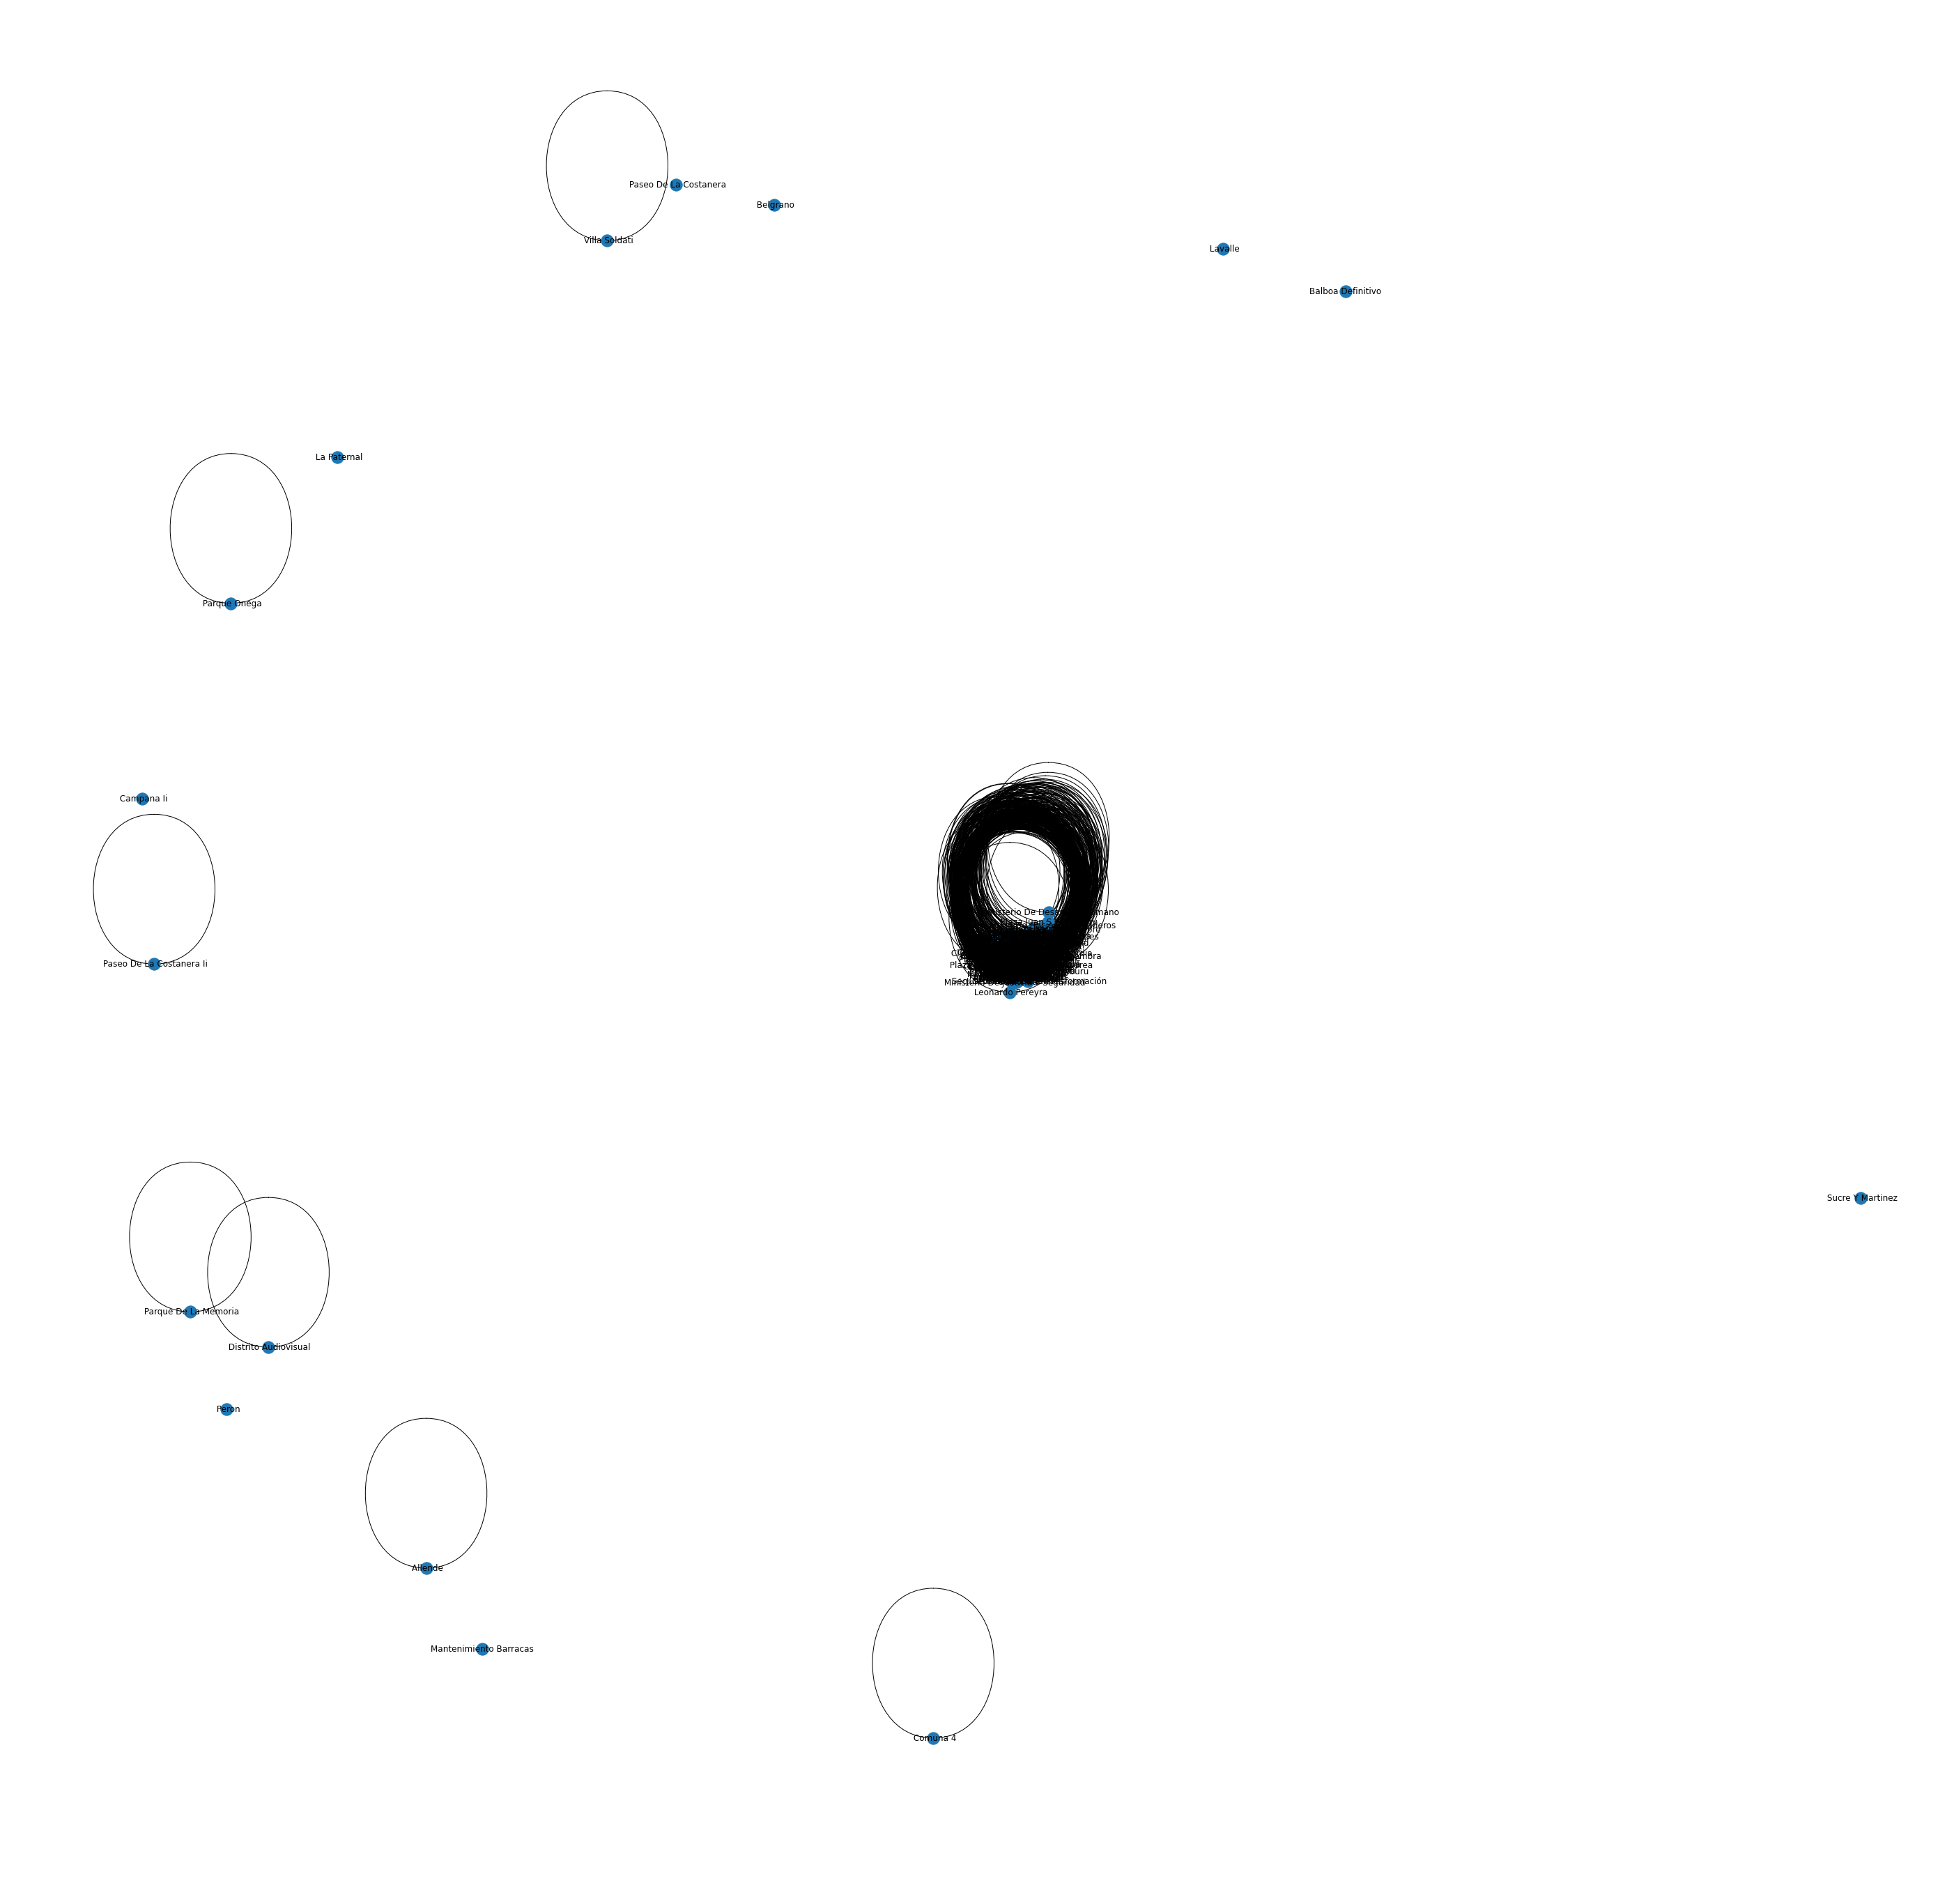

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize = (50,50))

# Draw the graph
nx.draw(graph, with_labels=True, ax=ax)

# Display the graph
plt.show()

In [ ]:
tupla[1]

-58.37125

In [206]:
colors

[(0.7893886966551327, 0.2768166089965398, 0.2549019607843137, 1.0),
 (0.0196078431372549, 0.18823529411764706, 0.3803921568627451, 1.0),
 (0.47312572087658594, 0.022145328719723183, 0.132641291810842, 1.0),
 (0.669204152249135, 0.08489042675893888, 0.16401384083044984, 1.0),
 (0.45005767012687425, 0.014763552479815456, 0.12895040369088812, 1.0),
 (0.45005767012687425, 0.014763552479815456, 0.12895040369088812, 1.0),
 (0.7838523644752018, 0.2657439446366781, 0.24967320261437903, 1.0),
 (0.6115340253748558, 0.06643598615916955, 0.1547866205305652, 1.0),
 (0.5538638985005767, 0.04798154555940023, 0.1455594002306805, 1.0),
 (0.7340253748558246, 0.16608996539792387, 0.20261437908496732, 1.0),
 (0.4615916955017301, 0.01845444059976932, 0.13079584775086506, 1.0),
 (0.47312572087658594, 0.022145328719723183, 0.132641291810842, 1.0),
 (0.5192618223760093, 0.03690888119953864, 0.1400230680507497, 1.0),
 (0.47312572087658594, 0.022145328719723183, 0.132641291810842, 1.0),
 (0.47312572087658594, 0

In [162]:
colormap

In [59]:
# Define colormap for the edge weights
colormap = linear.YlOrRd_09.scale(weight_min, weight_max)


In [61]:
colormap

In [36]:
graph.edges

EdgeView([(' Plaza Italia', ' Plaza Italia'), (' Plaza Italia', ' Humahuaca'), (' Plaza Italia', ' General Urquiza'), (' Plaza Italia', ' Guatemala'), (' Plaza Italia', ' Ecoparque'), (' Plaza Italia', ' Acevedo'), (' Plaza Italia', ' Carlos Gardel'), (' Plaza Italia', ' Barrancas De Belgrano'), (' Plaza Italia', ' Pacifico'), (' Plaza Italia', ' Plaza Almagro'), (' Plaza Italia', ' Billinghurst'), (' Plaza Italia', ' Aguero'), (' Plaza Italia', ' Plaza Alemania'), (' Plaza Italia', ' Posadas'), (' Plaza Italia', ' Arenales Y Aguero'), (' Plaza Italia', ' Facultad De Derecho'), (' Plaza Italia', ' F.j.santamaria De Oro'), (' Plaza Italia', ' Parque Las Heras'), (' Plaza Italia', ' Yatay'), (' Plaza Italia', 'Hospital De Clínicas'), (' Plaza Italia', ' Armenia Y Gorriti'), (' Plaza Italia', ' Coronel Diaz'), (' Plaza Italia', ' Godoy Cruz Y Libertador'), (' Plaza Italia', ' Riobamba'), (' Plaza Italia', ' Matienzo Y Arce'), (' Plaza Italia', ' Araoz'), (' Plaza Italia', ' Plaza Repúblic

In [35]:
graph.edges

EdgeView([(' Plaza Italia', ' Plaza Italia'), (' Plaza Italia', ' Humahuaca'), (' Plaza Italia', ' General Urquiza'), (' Plaza Italia', ' Guatemala'), (' Plaza Italia', ' Ecoparque'), (' Plaza Italia', ' Acevedo'), (' Plaza Italia', ' Carlos Gardel'), (' Plaza Italia', ' Barrancas De Belgrano'), (' Plaza Italia', ' Pacifico'), (' Plaza Italia', ' Plaza Almagro'), (' Plaza Italia', ' Billinghurst'), (' Plaza Italia', ' Aguero'), (' Plaza Italia', ' Plaza Alemania'), (' Plaza Italia', ' Posadas'), (' Plaza Italia', ' Arenales Y Aguero'), (' Plaza Italia', ' Facultad De Derecho'), (' Plaza Italia', ' F.j.santamaria De Oro'), (' Plaza Italia', ' Parque Las Heras'), (' Plaza Italia', ' Yatay'), (' Plaza Italia', 'Hospital De Clínicas'), (' Plaza Italia', ' Armenia Y Gorriti'), (' Plaza Italia', ' Coronel Diaz'), (' Plaza Italia', ' Godoy Cruz Y Libertador'), (' Plaza Italia', ' Riobamba'), (' Plaza Italia', ' Matienzo Y Arce'), (' Plaza Italia', ' Araoz'), (' Plaza Italia', ' Plaza Repúblic

In [31]:
print(graph)

Graph with 331 nodes and 4621 edges


In [ ]:
tupla[1]

-58.37125